In [1]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from MLalgorithms.svm import SVM
import numpy as np
%matplotlib inline

Математическая основа для реализации алгорима с линейным ядром была взята с курсеры:

- https://www.coursera.org/lecture/supervised-learning/mietod-opornykh-viektorov-svm-dc5N4

Код для визуализации с этого замечательного канала:

- https://www.youtube.com/channel/UCbXgNpp0jedKWcQiULLbDTA

Суть алгоритма состоит в том, чтобы найти оптимальную разделяющую границу для наших данных, путем введения некоторых условий. Отсюда и вытекает следущая специфичная кусочно-линейная функция потерь:
$$L = \frac{1}{n}\displaystyle\sum\limits_{i=0}^n max(0, 1 - y_{i}(wx_{i} - b)) + \lambda||w||^{2}$$

Следовательно градиенты функции потерь будут следующие:

Если
$$y_{i}(wx_{i} - b)\geq 1$$

Тогда
$$L_i = \lambda||w||^2$$
$$\frac{\partial L_i}{\partial w} = 2\lambda||w|| $$
$$\frac{\partial L_i}{\partial b} = 0 $$

Иначе
$$L_i = 1 - y_{i}(wx_{i} - b) + \lambda||w||^2$$
$$\frac{\partial L_i}{\partial w} = -y_ix_i + 2\lambda||w|| $$
$$\frac{\partial L_i}{\partial b} = y_i $$

In [2]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

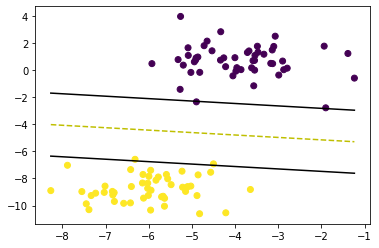

In [5]:
X, y = datasets.make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 17)

svm = SVM()
svm.fit(X, y)

fig = plt.figure()
        
ax = fig.add_subplot(1,1,1)
plt.scatter(X[:,0], X[:,1], marker='o',c=y)

x0_1 = np.amin(X[:,0])
x0_2 = np.amax(X[:,0])

x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b, 0)
x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b, 0)

x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b, -1)
x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b, -1)

x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b, 1)
x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b, 1)

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

In [7]:
svm_test = SVM()

In [8]:
svm_test.fit(X_train, y_train)

In [9]:
y_pred = svm_test.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

1.0